<a href="https://colab.research.google.com/github/hemukurra/deep-learning/blob/main/3layerRELU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
30/30 [==============================] - 3s 93ms/step - loss: 0.1771 - accuracy: 0.7487 - val_loss: 0.1224 - val_accuracy: 0.8468
Epoch 2/20
30/30 [==============================] - 3s 109ms/step - loss: 0.0985 - accuracy: 0.8783 - val_loss: 0.1002 - val_accuracy: 0.8680
Epoch 3/20
30/30 [==============================] - 4s 141ms/step - loss: 0.0774 - accuracy: 0.9011 - val_loss: 0.0837 - val_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 4s 145ms/step - loss: 0.0618 - accuracy: 0.9228 - val_loss: 0.0830 - val_accuracy: 0.8919
Epoch 5/20
30/30 [==============================] - 2s 67ms/step - loss: 0.0545 - accuracy: 0.9321 - val_loss: 0.0856 - val_accuracy: 0.8842
Epoch 6/20
30/30 [==============================] - 2s 67ms/step - loss: 0.0477 - accuracy: 0.9425 - val_loss: 0.0834 - val_accuracy: 0.8896
Epoch 7/20
30/30 [==============================] - 2s 68ms/step - loss: 0.0413 - accuracy: 0.9497 - val_loss: 0.0918 - val_accuracy: 0.8762
Epoch 8/20

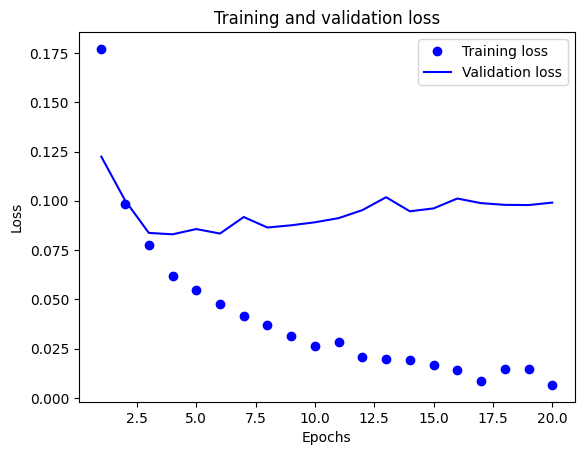

In [ ]:
from keras.datasets import imdb
from keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Vectorize the data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Vectorize the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.4, verbose=1)

# Plotting the training and validation loss
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
